# import

In [3]:
import os
import re
import pandas as pd
import numpy as np

# Google Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# 경로로 이동
path = '/content/drive/MyDrive/bert_classification_kor/preprocessing/'
os.chdir(path)

In [5]:
os.getcwd()

'/content/drive/MyDrive/bert_classification_kor/preprocessing'

In [6]:
os.listdir()

['Untitled0.ipynb', 'data', 'crawling_data']

#경로에 있는 모든 파일명 읽어오기

In [27]:
path = '/content/drive/MyDrive/bert_classification_kor/preprocessing/crawling_data/'
filenames = os.listdir(path)

# 가게명 중복 제거
filenames = list(set(filenames))
print(filenames)

['All_data.csv']


In [28]:
yogiyo_review = None

# 알려준 크롤러로 돌렸다면 컬럼명이 같이 있을 것이다.
# concat할 때 헤더명까지 같이 합쳐지는 것을 막기 위해 header=None으로 주고 나중에 컬럼명을 붙여줄 수도 있지만
# 자동으로 추가되었던 인덱스열을 처리하기 귀찮기 때문에 그냥 다 붙이고 나중에 없애겠다. 
for filename in filenames:
    if filename[-3:] == 'csv' :
        temp = pd.read_csv(path + filename) # sep=','

    elif filename[-3:] == 'txt' :
        temp = pd.read_table(path + filename) # sep='\t'
    
    if yogiyo_review is None:
        yogiyo_review = temp
        continue

    yogiyo_review = pd.concat([yogiyo_review, temp])

# 인덱스 초기화
yogiyo_review = yogiyo_review.reset_index()

# 만약 자동으로 생성되었던 인덱스 열이 있다면 날려버리기
if 'Unnamed: 0' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['Unnamed: 0'], axis=1)
if 'Unnamed: 0.1' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['Unnamed: 0.1'], axis=1)
if 'index' in yogiyo_review.columns :
    yogiyo_review = yogiyo_review.drop(['index'], axis=1)

# 카테고리를 범주형 데이터로 변환 
yogiyo_review.Category = yogiyo_review.Category.astype('category')

yogiyo_review_df = yogiyo_review.copy()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
print(yogiyo_review.shape)
yogiyo_review.head()

(224095, 11)


,Category,Location,Restaurant,UserID,Menu,Review,Date,Total,Taste,Quantity,Delivery
0,분식,운정1동,1981옛날통닭,50**님,"옛날통닭/1(사이즈 선택(1마리)),닭강정/1(닭강정 맛 선택(순한맛))",여기 정말 맛있어요~♡,2021년 07월 14일,5,5,5,5
1,분식,운정1동,1981옛날통닭,mi**님,옛날통닭/1(사이즈 선택(2마리)),맛잇게 잘먹었네요ㅋ,2021년 07월 06일,5,5,5,5
2,분식,운정1동,1981옛날통닭,손님,"옛날통닭/1(사이즈 선택(1마리)),반반치킨（양념반＋후라이드반）/1(음료 추가 선택...",별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,2021년 06월 01일,1,1,1,1
3,분식,운정1동,1981옛날통닭,bo**님,"옛날통닭/1(사이즈 선택(1마리)),양념치킨/1(음료 추가 선택(선택 안함))",맛있어요. 남편이 좋아하네요.,2021년 05월 29일,5,5,5,5
4,분식,운정1동,1981옛날통닭,wn**님,"닭껍질튀김 /1,양념소스 추가/1,1866 블론드 3캔 ＋ 1866 블랑쉬 1캔/1",바삭하고 맛있어요~^^!,2021년 05월 24일,5,5,5,5


In [30]:
# 쓸데 없는 행 날려버리기
yogiyo_review_df = yogiyo_review_df[yogiyo_review_df['Total']!='Total']
print(yogiyo_review_df.shape)
yogiyo_review_df.head()

(223986, 11)


,Category,Location,Restaurant,UserID,Menu,Review,Date,Total,Taste,Quantity,Delivery
0,분식,운정1동,1981옛날통닭,50**님,"옛날통닭/1(사이즈 선택(1마리)),닭강정/1(닭강정 맛 선택(순한맛))",여기 정말 맛있어요~♡,2021년 07월 14일,5,5,5,5
1,분식,운정1동,1981옛날통닭,mi**님,옛날통닭/1(사이즈 선택(2마리)),맛잇게 잘먹었네요ㅋ,2021년 07월 06일,5,5,5,5
2,분식,운정1동,1981옛날통닭,손님,"옛날통닭/1(사이즈 선택(1마리)),반반치킨（양념반＋후라이드반）/1(음료 추가 선택...",별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,2021년 06월 01일,1,1,1,1
3,분식,운정1동,1981옛날통닭,bo**님,"옛날통닭/1(사이즈 선택(1마리)),양념치킨/1(음료 추가 선택(선택 안함))",맛있어요. 남편이 좋아하네요.,2021년 05월 29일,5,5,5,5
4,분식,운정1동,1981옛날통닭,wn**님,"닭껍질튀김 /1,양념소스 추가/1,1866 블론드 3캔 ＋ 1866 블랑쉬 1캔/1",바삭하고 맛있어요~^^!,2021년 05월 24일,5,5,5,5


In [31]:
# 문자열 값을 숫자형으로 바꾸기
yogiyo_review_df[['Total', 'Taste', 'Quantity', 'Delivery']] = yogiyo_review_df[['Total', 'Taste', 'Quantity', 'Delivery']].apply(pd.to_numeric)
#yogiyo_review_df[['Total','Taste','Quantity','Delivery']].astype('int') 

yogiyo_review_df.Total.unique()

array([5, 1, 3, 4, 2])

In [32]:
# 모든 크롤링 데이터를 합친 파일(csv)로 저장
# 헤더는 그대로 냅두고 인덱스 열 날려버리기
# 왜냐하면 나중에 또 자동으로 추가되어서 Unnamed 열이 생기니까
yogiyo_review_df.to_csv('/content/drive/MyDrive/bert_classification_kor/preprocessing/data/data_all.csv', index = None)

In [33]:
yogiyo_review_df = yogiyo_review_df.drop(['Category','Location','Restaurant','UserID','Menu','Date','Taste','Quantity','Delivery'],axis=1)
yogiyo_review_df

,Review,Total
0,여기 정말 맛있어요~♡,5
1,맛잇게 잘먹었네요ㅋ,5
2,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,1
3,맛있어요. 남편이 좋아하네요.,5
4,바삭하고 맛있어요~^^!,5
...,...,...
224090,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,5
224091,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,5
224092,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨...,5
224093,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,5


In [34]:
yogiyo_review_df.Total.value_counts()

5    181313
4     26165
3      8696
1      5014
2      2798
Name: Total, dtype: int64

In [35]:
# 불용어 및 특수문자를 없애는 함수
def regex_review(review):
    p = re.compile('[^가-힣 ]')
    result = p.sub('',review)
    result = result.strip()
    result = result.replace('  ', ' ')
    result = result.replace('   ', ' ')
    return result
yogiyo_review_df['regex_review'] = yogiyo_review_df['Review'].apply(regex_review)
yogiyo_review_df

,Review,Total,regex_review
0,여기 정말 맛있어요~♡,5,여기 정말 맛있어요
1,맛잇게 잘먹었네요ㅋ,5,맛잇게 잘먹었네요
2,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,1,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀하세요
3,맛있어요. 남편이 좋아하네요.,5,맛있어요 남편이 좋아하네요
4,바삭하고 맛있어요~^^!,5,바삭하고 맛있어요
...,...,...,...
224090,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,5,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...
224091,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,5,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...
224092,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨...,5,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨무...
224093,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,5,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다


In [36]:
# 정제한 리뷰의 길이를 센 컬럼 추가
yogiyo_review_df['길이'] = [len(regex_review) for regex_review in yogiyo_review_df.regex_review.to_list()]
yogiyo_review_df

,Review,Total,regex_review,길이
0,여기 정말 맛있어요~♡,5,여기 정말 맛있어요,10
1,맛잇게 잘먹었네요ㅋ,5,맛잇게 잘먹었네요,9
2,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,1,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀하세요,49
3,맛있어요. 남편이 좋아하네요.,5,맛있어요 남편이 좋아하네요,14
4,바삭하고 맛있어요~^^!,5,바삭하고 맛있어요,9
...,...,...,...,...
224090,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,5,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,77
224091,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,5,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,69
224092,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨...,5,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨무...,93
224093,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,5,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,47


In [37]:
# 글자 수가 12개 이상인 것만 남기기
yogiyo_review_df = yogiyo_review_df[yogiyo_review_df['길이'] >= 12]
yogiyo_review_df

,Review,Total,regex_review,길이
2,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀...,1,별로 닭에 기름한가득 세상에나 안먹었네요 옛날통닭도 기름한가득이진 않아요 기름제거좀하세요,49
3,맛있어요. 남편이 좋아하네요.,5,맛있어요 남편이 좋아하네요,14
5,골뱅이약많고 너무너무맛잇어여 통닭은 촉촉햇으면좋겠어여ㅠ,5,골뱅이약많고 너무너무맛잇어여 통닭은 촉촉햇으면좋겠어여,29
6,맛있어요!! 재주문하고 싶은 맛입니다🐔🍗🐔🍗,5,맛있어요 재주문하고 싶은 맛입니다,18
7,다맛있어요^^ 계란말이 아이들밥도둑이네요ㅎㅎ,5,다맛있어요 계란말이 아이들밥도둑이네요,20
...,...,...,...,...
224090,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,5,한마리에 너무 많이 서비스 보내주시고 손편지까지 감동입니다 배달도 빠르고 후라이드가...,77
224091,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,5,와한마리 시켰는데 같이딸려온게 더 많은듯 치킨도 맛있고 배달도 빠르고 서비스도 감사...,69
224092,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨...,5,후참잘이 드디어 생겼네요 언제생기나 기다렸는데용 역시나 바삭함 제스타일이야요 치킨무...,93
224093,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,5,배달도 빠르고 맛있네요 후라이드가 참 맛있어요 자주 먹을께요 얼음컵 사탕도 감사합니다,47


In [38]:
yogiyo_review_df.Total.value_counts()

5    172221
4     24868
3      8388
1      4928
2      2734
Name: Total, dtype: int64

In [39]:
# 리뷰와 평점열만 저장
# 헤더는 그대로 냅두고 인덱스 열 날려버리기
# 왜냐하면 나중에 또 자동으로 추가되어서 Unnamed 열이 생기니까
yogiyo_review_df[['Total', 'Review']].to_csv('/content/drive/MyDrive/bert_classification_kor/preprocessing/data/data_regex.csv', index = None)

676
12
44.586068246543334


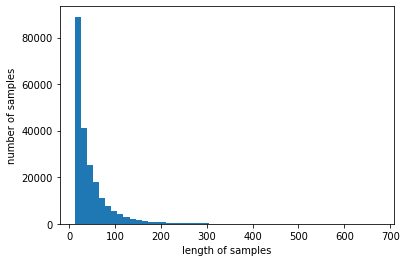

In [25]:
# 리뷰 길이 시각화
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/bert_classification_kor/preprocessing/data/data_regex.csv')

print(df.Review.apply(len).max())
print(df.Review.apply(len).min())
print(df.Review.apply(len).mean())

plt.hist([len(s) for s in df.Review], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()